In [2]:
import pandas as pd
import time
from matplotlib import pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [3]:
# Read in data

d = pd.read_parquet("yellow_tripdata_2023-01.parquet", engine='auto')

In [106]:
[c for c in d.columns]

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'diff_hrs',
 'diff_min',
 'diff_sec',
 'mph',
 'loc_pu_do',
 'pu_year',
 'pu_month',
 'do_year',
 'do_month']

In [58]:
d.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,diff_hrs,diff_min,diff_sec,mph,loc_pu_do,pu_year,pu_month,do_year,do_month
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.00,0.140556,8.433333,506.0,6.901186,161-141,2023,1,2023,1
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.00,0.105278,6.316667,379.0,10.448549,43-237,2023,1,2023,1
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.00,0.212500,12.750000,765.0,11.811765,48-238,2023,1,2023,1
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,1.25,0.160278,9.616667,577.0,11.854419,138-7,2023,1,2023,1
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.00,0.180556,10.833333,650.0,7.920000,107-79,2023,1,2023,1


In [4]:
# Read in zone locations

zone = pd.read_csv("taxi_zone_lookup.csv")

In [9]:
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [5]:
# Time difference between pickup and drop off

#data['diff_days'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']) / np.timedelta64(1, 'D')
d['diff_hrs'] = (d['tpep_dropoff_datetime'] - d['tpep_pickup_datetime']) / np.timedelta64(1, 'h')
d['diff_min'] = (d['tpep_dropoff_datetime'] - d['tpep_pickup_datetime']) / np.timedelta64(1, 'm')
d['diff_sec'] = (d['tpep_dropoff_datetime'] - d['tpep_pickup_datetime']) / np.timedelta64(1, 's')

# Distance per second

d['mph'] = d['trip_distance']/d['diff_hrs']


In [6]:
# Pickup and drop off points

d['loc_pu_do'] = d['PULocationID'].astype(str) + '-' + d['DOLocationID'].astype(str)

In [7]:
# Remove dates that don't make sense

# Create fields to figure out year and month
d['pu_year'] = d['tpep_pickup_datetime'].dt.year
d['pu_month'] = d['tpep_pickup_datetime'].dt.month

d['do_year'] = d['tpep_dropoff_datetime'].dt.year
d['do_month'] = d['tpep_dropoff_datetime'].dt.month

In [8]:
# Filter for only year = 2023 and month = 1

dataa = d[((d['pu_year'] == 2023) & (d['pu_month'] == 1)) & ((d['do_year'] == 2023) & (d['do_month'] == 1))]

In [9]:
# Exclude mph greater than 40 
data = dataa[(dataa['mph'] <= 40) & (dataa['mph'] > 0)]

# Exclude negative total amounts
data = data[(data['total_amount'] > 0)]

# Exclude negative tip amounts
data = data[(data['tip_amount'] >= 0)]

# Exclude negative fare amounts
data = data[(data['fare_amount'] > 0)]

# Create rush hour field
data['rush_hr'] = np.where( (data['tpep_pickup_datetime'].dt.dayofweek <= 4) & ((data['tpep_pickup_datetime'].dt.hour >= 16) & (data['tpep_pickup_datetime'].dt.hour < 19)), 1, 0 )




In [10]:
data.shape

(2977069, 29)

In [11]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,diff_hrs,diff_min,diff_sec,mph,loc_pu_do,pu_year,pu_month,do_year,do_month,rush_hr
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.140556,8.433333,506.0,6.901186,161-141,2023,1,2023,1,0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.105278,6.316667,379.0,10.448549,43-237,2023,1,2023,1,0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.212500,12.750000,765.0,11.811765,48-238,2023,1,2023,1,0
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.160278,9.616667,577.0,11.854419,138-7,2023,1,2023,1,0
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.180556,10.833333,650.0,7.920000,107-79,2023,1,2023,1,0


In [12]:
# Join in zone locations data for pickup and drop off to data

df = data.merge(zone, how = 'inner', left_on = 'PULocationID', right_on = 'LocationID')
dfmrg = df.merge(zone, how = 'inner', left_on = 'DOLocationID', right_on = 'LocationID')


In [21]:
dfmrg.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,do_month,rush_hr,LocationID_x,Borough_x,Zone_x,service_zone_x,LocationID_y,Borough_y,Zone_y,service_zone_y
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1,0,161,Manhattan,Midtown Center,Yellow Zone,141,Manhattan,Lenox Hill West,Yellow Zone
1,2,2023-01-01 00:21:43,2023-01-01 00:27:52,1.0,2.00,1.0,N,161,141,2,...,1,0,161,Manhattan,Midtown Center,Yellow Zone,141,Manhattan,Lenox Hill West,Yellow Zone
2,2,2023-01-01 00:11:44,2023-01-01 00:20:38,2.0,1.83,1.0,N,161,141,1,...,1,0,161,Manhattan,Midtown Center,Yellow Zone,141,Manhattan,Lenox Hill West,Yellow Zone
3,2,2023-01-01 00:35:52,2023-01-01 00:43:38,2.0,1.41,1.0,N,161,141,2,...,1,0,161,Manhattan,Midtown Center,Yellow Zone,141,Manhattan,Lenox Hill West,Yellow Zone
4,1,2023-01-01 00:51:12,2023-01-01 00:59:38,1.0,1.80,1.0,N,161,141,2,...,1,0,161,Manhattan,Midtown Center,Yellow Zone,141,Manhattan,Lenox Hill West,Yellow Zone


In [13]:
# Same or different borough

dfmrg['Same_Diff_Borough'] = np.where( dfmrg['Borough_x'] == dfmrg['Borough_y'], "SAME", "DIFFERENT")

# Create Airport field

dfmrg['Airport'] = np.where( (dfmrg['Zone_x'].str.contains("Airport")) | (dfmrg['Zone_y'].str.contains("Airport")), 1, 0)

# Calculated total amount

dfmrg['calc_total_amount'] = dfmrg['fare_amount'] + dfmrg['extra'] + dfmrg['mta_tax'] + dfmrg['improvement_surcharge'] + dfmrg['tolls_amount'] + dfmrg['congestion_surcharge'] + dfmrg['airport_fee']


In [14]:
# Condense the data

data_a = dfmrg[['VendorID','Airport', 'payment_type', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance','extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','airport_fee','congestion_surcharge','fare_amount','calc_total_amount','total_amount', 'loc_pu_do','rush_hr', 'mph','diff_hrs','diff_min','diff_sec', 'Borough_x','Zone_x','Borough_y','Zone_y','Same_Diff_Borough']]

data_a.columns = ['VendorID','Airport', 'payment_type', 'pickup_time', 'dropoff_time', 'passenger_count', 'trip_distance','extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','airport_fee', 'congestion_surcharge', 'fare_amount','calc_total_amount','total_amount', 'loc_pu_do','rush_hr', 'mph','hours','minutes','second', 'pu_borough', 'pu_zone', 'do_borough', 'do_zone','Same_Diff_Borough']


In [50]:
data_a.head()

,VendorID,payment_type,pickup_time,dropoff_time,passenger_count,trip_distance,congestion_surcharge,fare_amount,loc_pu_do,rush_hr,mph,hours,minutes,second,pu_borough,pu_zone,do_borough,do_zone,Same_Diff_Borough
0,2,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,2.5,9.3,161-141,0,6.901186,0.140556,8.433333,506.0,Manhattan,Midtown Center,Manhattan,Lenox Hill West,SAME
1,2,2,2023-01-01 00:21:43,2023-01-01 00:27:52,1.0,2.00,2.5,10.0,161-141,0,19.512195,0.102500,6.150000,369.0,Manhattan,Midtown Center,Manhattan,Lenox Hill West,SAME
2,2,1,2023-01-01 00:11:44,2023-01-01 00:20:38,2.0,1.83,2.5,11.4,161-141,0,12.337079,0.148333,8.900000,534.0,Manhattan,Midtown Center,Manhattan,Lenox Hill West,SAME
3,2,2,2023-01-01 00:35:52,2023-01-01 00:43:38,2.0,1.41,2.5,10.0,161-141,0,10.892704,0.129444,7.766667,466.0,Manhattan,Midtown Center,Manhattan,Lenox Hill West,SAME
4,1,2,2023-01-01 00:51:12,2023-01-01 00:59:38,1.0,1.80,2.5,10.0,161-141,0,12.806324,0.140556,8.433333,506.0,Manhattan,Midtown Center,Manhattan,Lenox Hill West,SAME


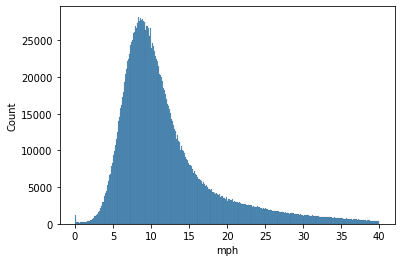

In [24]:
# Histogram of mph

sns.histplot(data = data_a, x = "mph")

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  # This is added back by InteractiveShellApp.init_path()


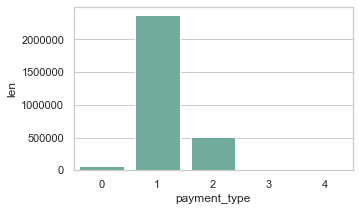

In [34]:
# Create pay type summary

pay_type = data_a.groupby(['payment_type'])['VendorID'].agg([len])

pay_type.reset_index(inplace = True)

# Barplot of passenger_count

plt.figure(figsize = (5, 3))

sns.barplot(x = 'payment_type', y = 'len', data = pay_type, estimator = sum, ci = None, color = '#69b3a2')

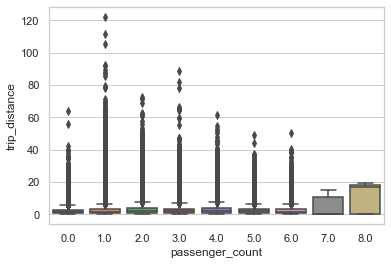

In [30]:
# Boxplot of passenger_count and trip distance

sns.set(style = 'whitegrid')

sns.boxplot(x = 'passenger_count', y = 'trip_distance', data = data_a)

In [37]:
# Correlation between trip distance and fare amount

np.corrcoef(data_a['trip_distance'], data_a['fare_amount'])

array([[1.        , 0.95804339],
       [0.95804339, 1.        ]])

In [45]:
# Correlation between time and fare amount

np.corrcoef(data_a['hours'], data_a['fare_amount'])

array([[1.        , 0.23289261],
       [0.23289261, 1.        ]])

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


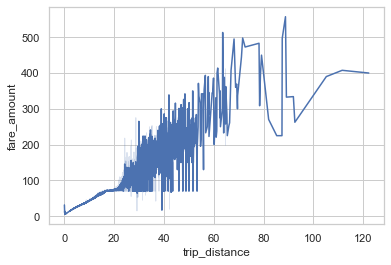

In [38]:
# Plot betweeen trip distance and fare amount

sns.lineplot(data = data_a, x = 'trip_distance', y = 'fare_amount')

In [33]:
# Overall speeds

data_a.groupby(['rush_hr'])['trip_distance','calc_total_amount','fare_amount','mph'].agg(np.mean)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,trip_distance,calc_total_amount,fare_amount,mph
rush_hr,,,,
0,3.363311,23.941584,18.258122,12.380232
1,3.143694,25.627606,18.002427,10.457736


In [32]:
data_a.head()

,VendorID,Airport,payment_type,pickup_time,dropoff_time,passenger_count,trip_distance,congestion_surcharge,fare_amount,loc_pu_do,...,do_borough,do_zone,Same_Diff_Borough,loc_pu_do_enc,Same_Diff_Borough_enc,trip_distance_enc,congestion_surcharge_enc,mph_enc,hours_enc,fare_amount_enc
0,2,0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,2.5,9.3,161-141,...,Manhattan,Lenox Hill West,SAME,5608,1,-0.560613,0.266592,-0.798795,-0.172980,-0.553631
1,2,0,2,2023-01-01 00:21:43,2023-01-01 00:27:52,1.0,2.00,2.5,10.0,161-141,...,Manhattan,Lenox Hill West,SAME,5608,1,-0.315959,0.266592,1.142477,-0.227378,-0.510183
2,2,0,1,2023-01-01 00:11:44,2023-01-01 00:20:38,2.0,1.83,2.5,11.4,161-141,...,Manhattan,Lenox Hill West,SAME,5608,1,-0.356339,0.266592,0.037978,-0.161862,-0.423286
3,2,0,2,2023-01-01 00:35:52,2023-01-01 00:43:38,2.0,1.41,2.5,10.0,161-141,...,Manhattan,Lenox Hill West,SAME,5608,1,-0.456100,0.266592,-0.184361,-0.188863,-0.510183
4,1,0,2,2023-01-01 00:51:12,2023-01-01 00:59:38,1.0,1.80,2.5,10.0,161-141,...,Manhattan,Lenox Hill West,SAME,5608,1,-0.363465,0.266592,0.110211,-0.172980,-0.510183


In [15]:
# Within borough speeds

data_a.groupby(['pu_borough','do_borough'])['mph'].agg([np.mean, len]).to_csv("Borough_speeds.csv")

In [55]:
# Borough speeds

bor_speeds = data_a.groupby(['Same_Diff_Borough','rush_hr'])['hours','trip_distance','fare_amount','calc_total_amount','total_amount','mph'].agg(np.mean)

bor_speeds

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


hours  trip_distance  fare_amount  \
Same_Diff_Borough rush_hr                                         
DIFFERENT         0        0.538650      11.337073    47.618801   
                  1        0.668175      12.384695    52.617125   
SAME              0        0.215253       2.096678    13.594176   
                  1        0.220831       1.930502    13.458082   

                           calc_total_amount  total_amount        mph  
Same_Diff_Borough rush_hr                                              
DIFFERENT         0                57.979078     64.916307  22.320376  
                  1                66.172094     74.187677  19.154758  
SAME              0                18.569354     20.590904  10.801239  
                  1                20.336001     22.589325   9.315959

In [56]:
bor_speeds['mins'] = bor_speeds['hours']*60
bor_speeds['calc_amt_over_mins'] = bor_speeds['calc_total_amount']/(bor_speeds['mins'])
bor_speeds['calc_amt_over_dist'] = bor_speeds['calc_total_amount']/(bor_speeds['trip_distance'])


In [57]:
bor_speeds

hours  trip_distance  fare_amount  \
Same_Diff_Borough rush_hr                                         
DIFFERENT         0        0.538650      11.337073    47.618801   
                  1        0.668175      12.384695    52.617125   
SAME              0        0.215253       2.096678    13.594176   
                  1        0.220831       1.930502    13.458082   

                           calc_total_amount  total_amount        mph  \
Same_Diff_Borough rush_hr                                               
DIFFERENT         0                57.979078     64.916307  22.320376   
                  1                66.172094     74.187677  19.154758   
SAME              0                18.569354     20.590904  10.801239   
                  1                20.336001     22.589325   9.315959   

                                mins  calc_amt_over_mins  calc_amt_over_dist  
Same_Diff_Borough rush_hr                                                     
DIFFERENT         0        32.319017            1.793962            5.114113  
                  1        40.090475            1.650569            5.343054  
SAME              0        12.915173            1.437794            8.856560  
                  1        13.249842            1.534811           10.534050

In [19]:
# Lets look into feature importance and see which variables affect fare_amount

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn import preprocessing

# Label encode the location pickup and dropoff

label_encoder = preprocessing.LabelEncoder()

# Encode the location pickup and dropoff

data_a['loc_pu_do_enc'] = label_encoder.fit_transform(data_a['loc_pu_do'])

# Encode Same borough or different borough

data_a['Same_Diff_Borough_enc'] = label_encoder.fit_transform(data_a['Same_Diff_Borough'])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
# Transform the variables with numeric value to standardization

from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

data_a['trip_distance_enc'] = pd.DataFrame(scale.fit_transform(data_a[['trip_distance']]))
data_a['congestion_surcharge_enc'] = pd.DataFrame(scale.fit_transform(data_a[['congestion_surcharge']]))
data_a['mph_enc'] = pd.DataFrame(scale.fit_transform(data_a[['mph']]))
data_a['hours_enc'] = pd.DataFrame(scale.fit_transform(data_a[['hours']]))

data_a['fare_amount_enc'] = pd.DataFrame(scale.fit_transform(data_a[['fare_amount']]))


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [21]:
# Train test split

#X = data_a[['Airport','payment_type','trip_distance_enc','congestion_surcharge_enc','loc_pu_do_enc','rush_hr','mph_enc','hours_enc','Same_Diff_Borough_enc']]
X = data_a[['Airport','trip_distance_enc','loc_pu_do_enc','rush_hr','mph_enc','hours_enc','Same_Diff_Borough_enc']]
Y = data_a['fare_amount']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [16]:
# Use Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()



NameError: name 'boston' is not defined

Text(0.5, 0, 'Feature Importance')

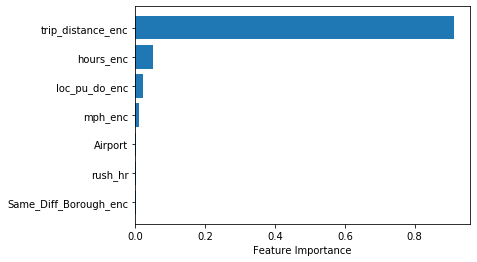

In [30]:
plt.barh(X.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

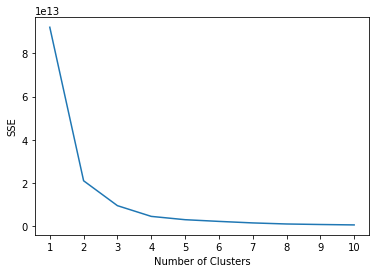

In [22]:
# K Means analysis

# Elbow method

from sklearn.cluster import KMeans

kmeans_kwargs = {
   "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}

sse = []

scaled_features = data_a[['Airport','trip_distance_enc','loc_pu_do_enc','rush_hr','mph_enc','hours_enc','Same_Diff_Borough_enc','fare_amount']]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [23]:
# Locate the cluster labels

kmeans = KMeans(n_clusters = 2)

kmeans.fit(scaled_features)

kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [24]:
# Cluster column

clust = pd.Series(kmeans.labels_)

clust.columns = ['Cluster']

In [25]:
# Add this back into data set

df_clust = pd.concat([data_a, clust], axis = 1) 

df_clust.rename(columns = {0:"Cluster"}, inplace = True)

In [26]:
# Look into mph and fare amount


df_clust.groupby(['Cluster','Same_Diff_Borough','rush_hr'])['hours','trip_distance','fare_amount','calc_total_amount','mph'].agg(np.mean)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


hours  trip_distance  fare_amount  \
Cluster Same_Diff_Borough rush_hr                                         
0       DIFFERENT         0        0.470101       8.587233    38.765532   
                          1        0.584418       9.182402    42.611973   
        SAME              0        0.212337       2.022997    13.274645   
                          1        0.213327       1.861043    13.045430   
1       DIFFERENT         0        0.572854      12.709139    52.036244   
                          1        0.700606      13.624644    56.491187   
        SAME              0        0.218490       2.178478    13.948914   
                          1        0.228575       2.002182    13.883935   

                                   calc_total_amount        mph  
Cluster Same_Diff_Borough rush_hr                                
0       DIFFERENT         0                47.463696  19.433120  
                          1                53.797263  16.026417  
        SAME              0                18.207277  10.732563  
                          1                19.895564   9.420035  
1       DIFFERENT         0                63.059687  23.761007  
                          1                70.796777  20.366073  
        SAME              0                18.969543  10.877482  
                          1                20.788942   9.208555